In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

<ipython-input-1-a0030765309d>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def get_stock_data(normalized=0):
    url = "EDELWEISSNS.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [3]:
df = get_stock_data(0)
df.head()

<ipython-input-2-d5396d546540>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


,Date,Open,High,Low,Close,Volume,Adj,Year,Month,Day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,2008,10,03
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,2008,10,06
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,2008,10,07
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,2008,10,08
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,2008,10,10


In [4]:
df.drop(df.columns[[0,6,7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume
0,41.299999,41.685001,39.400002,40.525002,0.002930
1,39.700001,40.799999,37.200001,39.564999,0.002860
2,40.000000,40.599998,36.000000,36.119999,0.002611
3,35.000000,44.400002,34.500000,40.880001,0.002955
4,40.400002,40.400002,35.299999,37.910000,0.002741


In [5]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Low'] = df['Low']/100
df['Close'] = df['Close']/100
df['Volume'] = df['Volume']*100

print(df)

       Open     High     Low    Close    Volume
0     0.413  0.41685  0.3940  0.40525  0.292964
1     0.397  0.40800  0.3720  0.39565  0.286023
2     0.400  0.40600  0.3600  0.36120  0.261119
3     0.350  0.44400  0.3450  0.40880  0.295530
4     0.404  0.40400  0.3530  0.37910  0.274059
...     ...      ...     ...      ...       ...
2462  2.180  2.21000  2.0850  2.18550  2.185500
2463  2.215  2.21500  2.1010  2.12150  2.121500
2464  2.132  2.14450  1.8520  1.89400  1.894000
2465  1.914  1.98850  1.8100  1.89500  1.895000
2466  1.890  1.90900  1.6905  1.87000  1.870000

[2467 rows x 5 columns]


In [6]:
nan_value_index = []
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Low = df.Low.isnull()
for i in range(0, len(Low)):
    if Low[i] == 1:
        nan_value_index.append(i)
        df['Low'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0

In [7]:
X = df[['Open','High','Low', 'Volume']]
Y = df[['Close']]

# Training Using TensorFLOW

In [8]:
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [9]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1973, 4)
y_train (1973, 1)
X_test (494, 4)
y_test (494, 1)


In [10]:
model = Sequential()
model.add(Dense(units = 32, activation = 'relu', input_dim = 4))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])

In [12]:
model.fit(X_train, Y_train, batch_size = 128, epochs = 100)

Epoch 1/100
16/16 [==============================] - 14s 18ms/step - loss: 0.0036
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 5.7419e-04
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 2.4121e-04
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 1.4230e-04
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0012e-04
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 7.7300e-05
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 7.2536e-05
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 7.0291e-05
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 6.9188e-05
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 6.8912e-05
Epoch 11/100
16/16 [==============================] - 0s 5ms/step - loss: 6.8578e-05
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 6.

16/16 [==============================] - 0s 4ms/step - loss: 5.0806e-05
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 5.0095e-05
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 5.2018e-05
Epoch 100/100
16/16 [==============================] - 0s 5ms/step - loss: 4.8971e-05


In [14]:
predictions = model.predict(X_test)

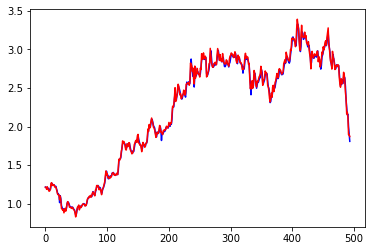

In [17]:
x_label = np.arange(0,predictions.shape[0],1)
plt.plot(x_label, predictions[:predictions.shape[0]], '-b', x_label, Y_test[:predictions.shape[0]], '-r')
plt.show()

# Training Using Pytorch

In [52]:
import torch
import math

In [53]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 32),
    torch.nn.Linear(32, 10),
    torch.nn.Linear(10, 1),
)

In [54]:
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-6

In [61]:
xx = torch.from_numpy(X_train.values)
yy = torch.from_numpy(Y_train.values)
print(xx.shape)
print(yy.shape)

torch.Size([1973, 4])
torch.Size([1973, 1])


In [62]:
xx = xx.to(torch.float32)
yy = yy.to(torch.float32)

In [63]:
for t in range(2000):
    y_pred = model(xx)

    loss = loss_fn(y_pred, yy)
    if t % 100 == 99:
        print(t, loss.item())

    model.zero_grad()

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 0.17403262853622437
199 0.1740177571773529
299 0.17400355637073517
399 0.17398971319198608
499 0.173976331949234
599 0.17396345734596252
699 0.1739508956670761
799 0.17393872141838074
899 0.17392678558826447
999 0.17391498386859894
1099 0.17390334606170654
1199 0.1738920360803604
1299 0.17388084530830383
1399 0.17386983335018158
1499 0.17385883629322052
1599 0.173847958445549
1699 0.17383712530136108
1799 0.1738264113664627
1899 0.1738157421350479
1999 0.1738051474094391


In [65]:
x_test = torch.from_numpy(X_test.values)
y_test = torch.from_numpy(Y_test.values)
x_test = x_test.to(torch.float32)
y_test = y_test.to(torch.float32)
print(x_test.shape)
print(y_test.shape)

torch.Size([494, 4])
torch.Size([494, 1])


In [66]:
y_pred_test = model(x_test)

In [67]:
y_test = y_test.detach().numpy()
y_pred_test = y_pred_test.detach().numpy()

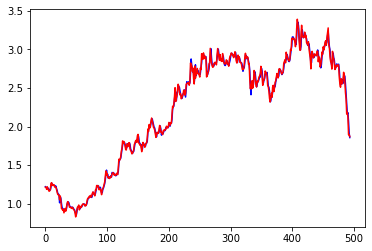

In [69]:
x_label = np.arange(0,y_pred_test.shape[0],1)
plt.plot(x_label, y_pred_test[:y_pred_test.shape[0]], '-b', x_label, y_test[:y_pred_test.shape[0]], '-r')
plt.show()